In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import datetime
df=pd.read_csv('Car.csv')
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [60]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [61]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [62]:
df.duplicated().sum()

np.int64(763)

In [63]:
df.shape

(4340, 8)

In [64]:
df.drop_duplicates(inplace=True)

In [65]:
df.shape

(3577, 8)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3577 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           3577 non-null   object
 1   year           3577 non-null   int64 
 2   selling_price  3577 non-null   int64 
 3   km_driven      3577 non-null   int64 
 4   fuel           3577 non-null   object
 5   seller_type    3577 non-null   object
 6   transmission   3577 non-null   object
 7   owner          3577 non-null   object
dtypes: int64(3), object(5)
memory usage: 251.5+ KB


In [67]:
le = LabelEncoder()
categorical_cols = ['fuel', 'seller_type', 'transmission', 'owner']
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,4,1,1,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,4,1,1,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,1,1,0
3,Datsun RediGO T Option,2017,250000,46000,4,1,1,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,1,1,2
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,1,1,1,2
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,1,1,1,2
4337,Maruti 800 AC BSIII,2009,110000,83000,4,1,1,2
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,1,1,1,0


In [68]:
numeric_cols = ['year', 'km_driven']  # Add other numeric features if needed
for col in numeric_cols:
    skew_value = df[col].skew()
    print(f"{col} skewness: {skew_value:.2f}")

year skewness: -0.79
km_driven skewness: 2.55


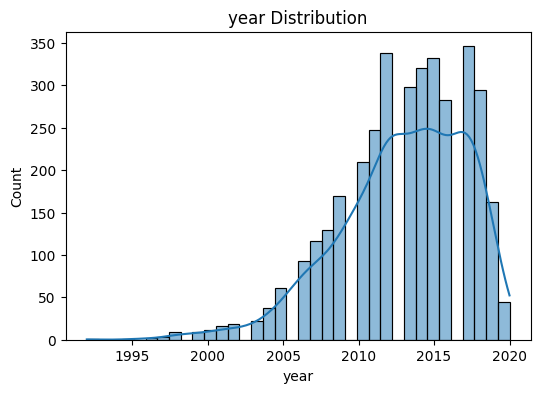

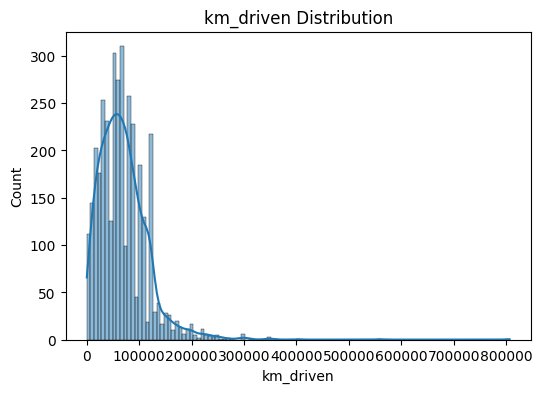

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f'{col} Distribution')
    plt.show()


In [70]:
if df['selling_price'].skew() > 1:
    df['selling_price'] = np.log1p(df['selling_price'])
if df['km_driven'].skew() > 1:
    df['km_driven'] = np.log1p(df['km_driven'])

In [71]:
print("Skewness after log-transform:")
for col in ['selling_price', 'km_driven']:
    print(f"{col} skewness: {df[col].skew():.2f}")

Skewness after log-transform:
selling_price skewness: -0.02
km_driven skewness: -1.97


In [72]:
import pandas as pd

numeric_cols = ['selling_price', 'km_driven', 'year']  # numeric features

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col} Outliers: {len(outliers)}")


selling_price Outliers: 29
km_driven Outliers: 137
year Outliers: 37


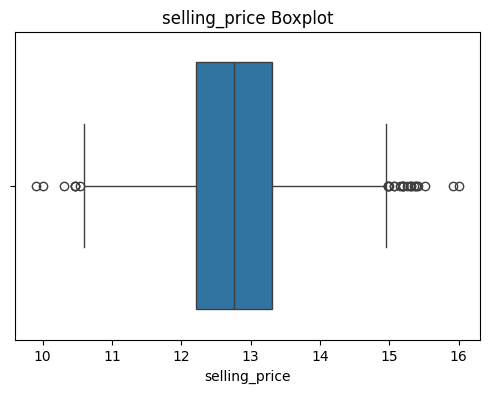

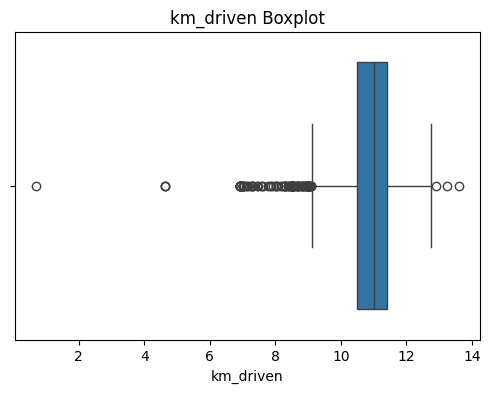

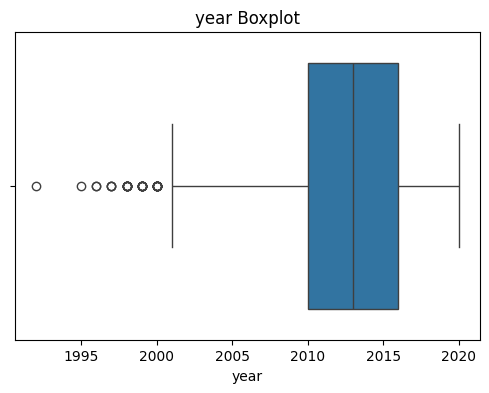

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f'{col} Boxplot')
    plt.show()


In [74]:
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]


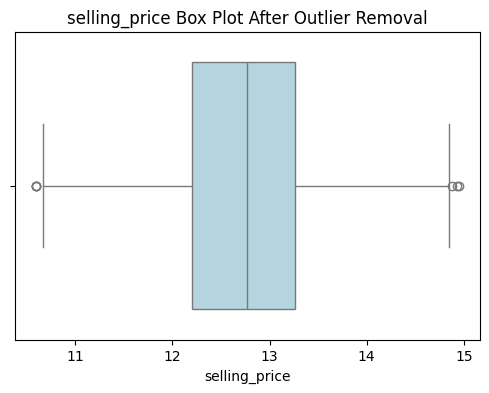

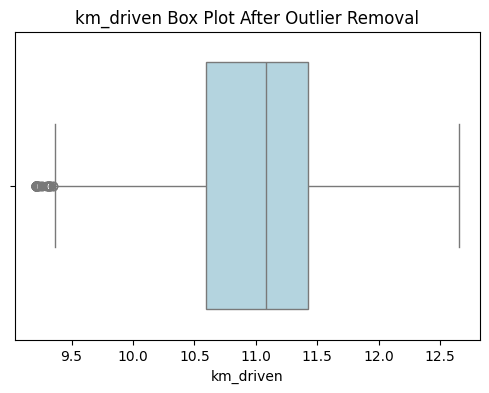

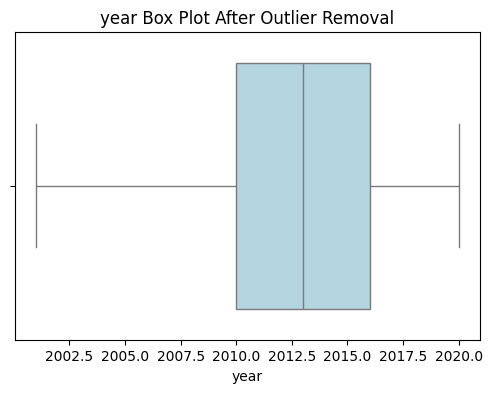

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = ['selling_price', 'km_driven', 'year']

# Create box plots for each numeric column
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col], color='lightblue')
    plt.title(f'{col} Box Plot After Outlier Removal')
    plt.xlabel(col)
    plt.show()


In [76]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded['selling_price'] = np.log1p(df_encoded['selling_price'])
X = df_encoded.drop('selling_price', axis=1)
y = df_encoded['selling_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
gbr = GradientBoostingRegressor(random_state=42)
params = {'n_estimators': [100, 200],'learning_rate': [0.05, 0.1],'max_depth': [3, 4]}

kf = KFold(n_splits=5, shuffle=True, random_state=42)
grid = GridSearchCV(gbr, param_grid=params, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1)
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
if 'selling_price' in ['selling_price', 'km_driven']: 
    y_test_exp = np.expm1(y_test)
    y_pred_exp = np.expm1(y_pred)
else:
    y_test_exp = y_test
    y_pred_exp = y_pred

rmse = mean_squared_error(y_test_exp, y_pred_exp)**0.5
r2 = r2_score(y_test_exp, y_pred_exp)

print("Best Parameters:", grid.best_params_)
print("RMSE:", round(rmse,2))
print("R² Score:", round(r2,2))

Best Parameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 200}
RMSE: 0.41
R² Score: 0.72
